In [1]:
import numpy as np
import matplotlib 
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas import Series,DataFrame

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 8
print(np.version.full_version)
print(matplotlib.__version__)
print(pd.__version__)

1.15.4
2.1.1
0.23.4


In [2]:
from scipy.io import loadmat

# データの読み込み
def load_data1():
    data = loadmat("./03_Logistic Regression_data_03.mat")
    # yが元データだと5000x1の行列なので、ベクトルに変換する
    return np.array(data['X']), np.ravel(np.array(data['y']))

X_data, y = load_data1()
m = len(X_data[:, 1])
print(X_data.shape)
print(y.shape)
print(m)

(5000, 400)
(5000,)
5000


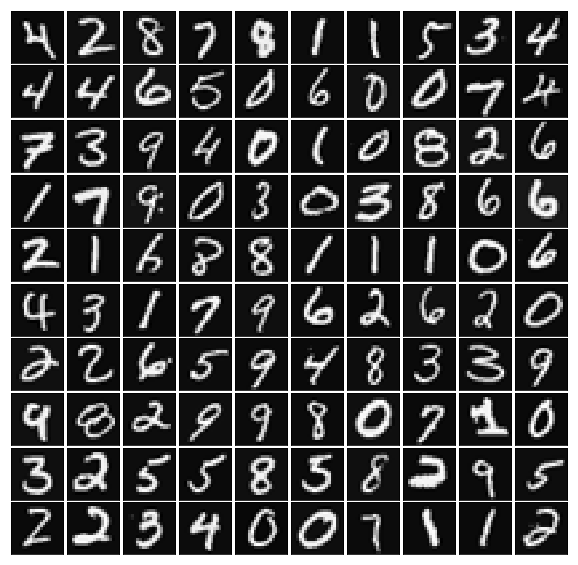

In [3]:
# ランダムに100個を画像で表示
np.random.seed(114514)# ここをコメントアウトすると再現性はなくなる
sel = np.arange(m)
np.random.shuffle(sel)
sel = sel[:100]
fig = plt.figure(figsize = (10, 10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
for i in range(100):
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(X_data[sel[i]].reshape((20, 20)).T, cmap='gray')
plt.show()

In [4]:
# シグモイド関数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

$\large h_\theta(x) = \theta^T x$

$\large J(\theta) = - \frac{1}{m} [ \sum_{i=1}^m y^{(i)} log(h_\theta (x^{(i)})) + (1 - y^{(i)}) log(1 - h_\theta (x^{(i)}))] +   \frac{\lambda}{2m}  \sum_{j=1}^n \theta_j^2$

<hr/>
$\large grad(\theta_0) = \frac{1}{m} \sum_{i=1}^m (h_\theta (x^{(i)})-y^{(i)}) x_0^{(i)})$

$\large grad(\theta_j) = \frac{1}{m} \sum_{i=1}^m (h_\theta (x^{(i)})-y^{(i)}) x_j^{(i)}) +   \frac{\lambda}{m} \theta_j$

<hr/>

<img width=800  src="https://camo.qiitausercontent.com/955d5217cadcb88eb86720b8ec244020c483f0d9/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f3130323338372f66353935376164362d633336642d353861612d356533632d3861626365303036633465352e706e67">

In [5]:
# ロジスティック回帰のコスト関数
def lr_cost_function(theta, X, y, lambda_):
    m = len(y)
    h_theta = sigmoid(np.dot(X, theta))
    
    # θ0を正則化しないようにする
    J = np.sum(-y * np.log(h_theta) - (1 - y) * np.log(1 - h_theta)) / m + lambda_ / 2 / m * np.sum(theta[1:] ** 2)
    
    grad = np.dot(X.T, h_theta - y) / m
    temp = theta[:]
    temp[0] = 0
    grad += lambda_ / m * temp
    return J, grad

In [6]:
# コスト関数のテスト
print("Testing lrCostFunction() with regularization")
theta_t = np.array([-2, -1, 1, 2])
X_t = np.c_[np.ones(5), np.arange(1, 16).reshape(5, 3, order='F') / 10] 
y_t = (np.array([1, 0, 1, 0, 1]) >= 0.5).astype(int)
print(X_t)
print(y_t)
lambda_t = 3
J, grad = lr_cost_function(theta_t, X_t, y_t, lambda_t)
print("Cost:", J)
print("Expected cost: 2.534819")
print("Gradients:")
print(grad)
print("Expected gradients:")
print(" 0.146561\n -0.548558\n 0.724722\n 1.398003\n")

Testing lrCostFunction() with regularization
[[1.  0.1 0.6 1.1]
 [1.  0.2 0.7 1.2]
 [1.  0.3 0.8 1.3]
 [1.  0.4 0.9 1.4]
 [1.  0.5 1.  1.5]]
[1 0 1 0 1]
Cost: 2.534819396109744
Expected cost: 2.534819
Gradients:
[ 0.14656137 -0.54855841  0.72472227  1.39800296]
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003



In [9]:
# 最急降下法（組み込みが遅いので自分で実装）
def gradient_descent(initial_theta, X, y, lambda_, eta, maxiter = 10001, tol=1e-3):
    theta_before = initial_theta
    for i in range(maxiter):
        J, grad = lr_cost_function(theta_before, X, y, lambda_)
        theta = theta_before - eta * grad
        norm = np.linalg.norm(theta - theta_before)
        if(i%5000==0) : print("i =",i,", norm =", norm, "J =",J)
        if norm < tol:
            print("収束完了", i)
            break
        theta_before = theta
    return theta

In [10]:
# One-vs-allの訓練
def one_vs_all(X, y, num_labels, lambda_):
    m = X.shape[0]
    n = X.shape[1]
    print(m)
    print(n)
    all_theta = np.zeros((num_labels, n + 1))
    X = np.c_[np.ones(m), X]
    for i in range(num_labels):
        print(i)
        print("One vs all :", i+1, "/", num_labels)
        initial_theta = np.zeros(n+1)
        y_param = y == i+1
        theta = gradient_descent(initial_theta, X, y_param.astype(int), lambda_, 1)
        all_theta[i, :] = theta
    return all_theta

In [11]:
num_labels = 10
lambda_ = 0.1
all_theta = one_vs_all(X_data, y, num_labels, lambda_)

5000
400
0
One vs all : 1 / 10
i = 0 , norm = 1.894583716453166 J = 0.6931471805599454
i = 5000 , norm = 0.0012445793264148851 J = 0.02014243595399376
収束完了 8060
1
One vs all : 2 / 10
i = 0 , norm = 1.72880145979865 J = 0.6931471805599454
i = 5000 , norm = 0.0028312530348580953 J = 0.061987884677332974
i = 10000 , norm = 0.0025431952161457474 J = 0.05851645678051768
2
One vs all : 3 / 10
i = 0 , norm = 1.7256634303715668 J = 0.6931471805599454
i = 5000 , norm = 0.004678918172403124 J = 0.07380984754814031
i = 10000 , norm = 0.004384290115108782 J = 0.07123700092384423
3
One vs all : 4 / 10
i = 0 , norm = 1.7894294801504784 J = 0.6931471805599454
i = 5000 , norm = 0.0018434516270716718 J = 0.04219626601154717
i = 10000 , norm = 0.0014439990823128374 J = 0.038295425314919744
4
One vs all : 5 / 10
i = 0 , norm = 1.7672935728497838 J = 0.6931471805599454
i = 5000 , norm = 0.0012228317265901615 J = 0.06238763756453116
収束完了 6851
5
One vs all : 6 / 10
i = 0 , norm = 1.7476114348124299 J = 0.69

In [12]:
# 予測
print(all_theta.shape)

def predict_one_vs_all(all_theta, X):
    m = X.shape[0]
    num_labels = all_theta.shape[0]
    XX = np.c_[np.ones(m), X]
    pred_array = sigmoid(np.dot(XX, all_theta.T))
    print(pred_array)
    p = np.argmax(pred_array, axis=1)+1 #行単位で集計
    return p

pred = predict_one_vs_all(all_theta, X_data)
print(np.bincount(pred))
print("Training Set Accuracy: ", np.mean(pred == y) * 100)

(10, 401)
[[4.00203216e-12 3.72305080e-04 1.79003666e-04 ... 2.83841672e-04
  1.65728406e-03 9.99876103e-01]
 [3.68723103e-10 1.74970922e-05 1.56336033e-04 ... 1.08475362e-06
  1.59018325e-05 9.99910401e-01]
 [9.30893785e-13 1.25299674e-04 7.94143979e-05 ... 1.43507711e-02
  1.23909950e-03 9.96119252e-01]
 ...
 [3.92131346e-02 2.37218664e-03 1.82235434e-01 ... 1.26470576e-02
  8.69574611e-01 2.79015977e-07]
 [2.37992669e-10 3.34683010e-10 3.42554174e-07 ... 5.05840020e-03
  7.92583472e-01 1.43273065e-07]
 [4.02428421e-14 6.06431746e-06 3.75055774e-10 ... 9.88252896e-02
  2.85760763e-01 6.68467651e-03]]
[  0 512 489 485 503 483 501 497 510 511 509]
Training Set Accuracy:  94.78


<b>Scikit-learnの組み込み`LogisticRegressionで対応</b>

In [13]:
from sklearn.linear_model import LogisticRegression
X_data, y = load_data1()

# ロジスティック回帰
regr = LogisticRegression(multi_class="ovr", solver="newton-cg") #multi_class="ovr"でOneVsRest（1対多クラス分類になる）
print("X : shape =", X_data.shape)
print("y : shape =", y.shape)
print()
regr.fit(X_data, y)
print("切片 : shape =", regr.intercept_.shape)
print(regr.intercept_)
print("係数 : shape =", regr.coef_.shape)
print(regr.coef_)
print("精度 =",regr.score(X_data, y) * 100)

X : shape = (5000, 400)
y : shape = (5000,)

切片 : shape = (10,)
[-2.38368769 -3.18302619 -4.79746133 -2.01355322  0.17550713 -3.14856414
 -1.90394385 -7.98717568 -4.57254937 -5.40568903]
係数 : shape = (10, 400)
[[ 0.00000000e+00  0.00000000e+00  3.53650804e-05 ...  1.30431448e-03
  -7.29175668e-10  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.80610230e-05 ...  4.46082357e-03
  -5.08589273e-04  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -8.08986165e-06 ... -2.87050198e-05
  -2.47483307e-07  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00 -4.78980836e-06 ... -8.94785178e-05
   7.21469722e-06  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -5.50664587e-07 ... -1.33539650e-03
   9.98597491e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -2.35768210e-09 ... -1.16635470e-04
   7.88299299e-06  0.00000000e+00]]
精度 = 94.46


(1797, 64)


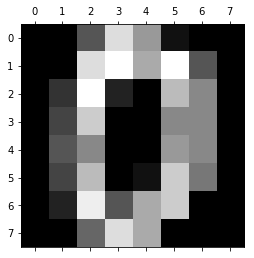

In [14]:


from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show() 